# Analyzing Healthy UC Berkeley Dining Hall Meals in Comparison to the Mediterranean Diet

Contributors: Contributors: Richa Bhattacharya, Audrey Booher, Anoushka Gupta, Daysha Patalot, Yinan Xia, Jenny Yu


### <u> Goal of this study </u> ###

The question our study addresses is, as a UC Berkeley student, should one buy a meal plan or cook for oneself and abide by the Mediterranean diet if one wishes to maintain a subsistence diet at the lowest cost. 

<b> [A] Description of Population of Interest: <b> 
    
Our population of interest is the UC Berkeley undergraduate student population. Freshmen, who live on campus, are designated a mandatory meal plan, while other undergraduate students may opt in to a meal plan, dine at campus restaurants, or cook for themselves at home

### <u> Context </u>

<i> What is the Mediterranean Diet </i>

The Mediterranean diet is based on the traditional diet of the Mediterranean region, including Spain, Italy, and Greece. These regions have exceptionally low rates of chronic diseases and are rather healthy, and so the Mediterranean diet has been studied for its benefits. This diet is believed to support brain function, promote heart health, regulate blood sugar levels,  lower blood pressure, etc. The diet recommends eating nutritious fruits, vegetables, nuts, legumes, whole grains, seafood, and potatoes, etc, while moderating the intake of eggs, cheese, poultry and yogurt, and rarely consuming red meat, processed foods, foods with added sugars, and foods with trans fats (“Mediterranean Diet 101”. According to “Mediterranean Diet: Ranked #1,...” by health.us.news, the Mediterranean diet is ranked #1 Best Diet Overall, #1 Best Diabetes Diet, #1 Best Weight-Loss Diets, #1 Best Diets for Healthy Eating, and #1 in Easiest Diets to Follow. One downside to the Mediterranean Diet is that it is less cost-friendly than other diets. This issue is especially relevant to our topic of interest: minimum cost diet. 

<i> Cal Dining and Bear Fit  </i>

Cal Dining is a part of Housing and Dining Operations, Residential and Student Service Programs (RSSP) here at the University of California, Berkeley. There are multiple meal plans for students living both on and off campus. For students, these plans are valid for the full academic year. Meal plans include a combination of meal swipes and flex dollars. Meal swipes are for use in the dining commons or as a “meal equivalency” swipe at various cafes on campus. Flex dollars may be used at campus restaurants, convenience stores, concession stands, and to pay for guest meals.
Flex dollars function like cash dollars—1 flex dollar has the purchasing power of 1 dollar. For example, a purchase of $5 would cost 5 flex dollars. 

Our csv and code utilize data provided from the Cal Dining website. We chose four “Bear Fit” meals from the Crossroads Dining Hall, which are considered to be the healthiest options. Bear Fit meals is designed to serve nutritious and delicious food that everyone can enjoy without worrying about common allergic or triggering ingredients with a menu free of the Big-8 food allergens: milk, eggs, shellfish, fish, peanuts, tree nuts, soy, and wheat. From these particular meals, we noted various nutritional facts in the ingredients used such as energy, protein, iron, and more, compared to those in the Mediterranean diet.

This information about Cal Dining  is relevant to our project as we consider and compare the various options that students have when choosing how they will eat for the academic year, particularly if the student wishes to maintain a healthy diet at the lowest financial cost.


### <u> Coding Deliverables </u>

Setting up the environment:

In [1]:
!pip install -r requirements.txt

  Using cached Pint-0.18-py2.py3-none-any.whl (209 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl
  Attempting uninstall: pint
    Found existing installation: Pint 0.17
    Uninstalling Pint-0.17:
      Successfully uninstalled Pint-0.17


In [2]:
import numpy as np
import pandas as pd
import http.client
import fooddatacentral as fdc

In [3]:
apikey = "an9JzugedN7gb0EvKlgsVs2iMVLIFVYOLcpdqUqo"

#### [A] Dietary Reference Intakes

We divided the total daily intake by 3 for all desired values under the assumption that there are about 3 meals per day that thee average male and female have. We also assume that the quantity of food, and hence the nutritional value of each meal, is roughly the same. This is useful because we can directly match up our nutritional requirements for one meal to our minimal cost diet, which also reflects one meal. 

In [4]:
diet_req = pd.read_csv("dietary_req.csv").drop(['Source'],axis=1)
diet_req = diet_req.set_index('Nutrition')
dietreq_meal=diet_req.div(3)
dietreq_meal.iloc[len(dietreq_meal)-1,:] = dietreq_meal.iloc[len(dietreq_meal)-1,:] * -1
dietreq_meal

,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,
Energy,333.333333,400.000000,466.666667,533.333333,600.000000,600.000000,733.333333,666.666667,800.000000,600.000000,733.333333,533.333333,666.666667
Protein,4.333333,6.333333,6.333333,11.333333,11.333333,15.333333,17.333333,15.333333,18.666667,15.333333,18.666667,15.333333,18.666667
"Fiber, total dietary",4.666667,5.600000,6.533333,7.466667,8.400000,8.400000,10.266667,9.333333,11.200000,8.400000,10.266667,7.466667,9.333333
"Folate, DFE",50.000000,66.666667,66.666667,100.000000,100.000000,133.333333,133.333333,133.333333,133.333333,133.333333,133.333333,133.333333,133.333333
"Calcium, Ca",233.333333,333.333333,333.333333,433.333333,433.333333,433.333333,433.333333,333.333333,333.333333,333.333333,333.333333,400.000000,333.333333
"Carbohydrate, by difference",43.333333,43.333333,43.333333,43.333333,43.333333,43.333333,43.333333,43.333333,43.333333,43.333333,43.333333,43.333333,43.333333
"Iron, Fe",2.333333,3.333333,3.333333,2.666667,2.666667,5.000000,3.666667,6.000000,2.666667,6.000000,2.666667,2.666667,2.666667
"Magnesium, Mg",26.666667,43.333333,43.333333,80.000000,80.000000,120.000000,136.666667,103.333333,133.333333,106.666667,140.000000,106.666667,140.000000
Niacin,2.000000,2.666667,2.666667,4.000000,4.000000,4.666667,5.333333,4.666667,5.333333,4.666667,5.333333,4.666667,5.333333


In [6]:
#These the the list of groups that fall into our target population. 
groups = ['M 19-30','F 19-30']

The function below allows us to access the recommended nutritional intakes for any population age and gender grouping. It also allows us to input the amount of activity we want to factor into our recommendations. 

In [7]:
def create_pop(group,activity):
    pop_req = dietreq_meal[group]
    pop_req.loc[0,group]= pop_req.iloc[0,1:3] + activity
    return pop_req.drop(0,axis=0)
group = create_pop(groups, 300)
group

/tmp/ipykernel_24/57864428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_req.loc[0,group]= pop_req.iloc[0,1:3] + activity


,M 19-30,F 19-30
Nutrition,,
Energy,800.000000,666.666667
Protein,18.666667,15.333333
"Fiber, total dietary",11.200000,9.333333
"Folate, DFE",133.333333,133.333333
"Calcium, Ca",333.333333,333.333333
"Carbohydrate, by difference",43.333333,43.333333
"Iron, Fe",2.666667,6.000000
"Magnesium, Mg",133.333333,103.333333
Niacin,5.333333,4.666667


#### [A] Nutritional Content of Different Foods

In [8]:
price_nutrition = pd.read_csv('PriceData.csv')
price_nutrition=price_nutrition.set_index("Ingredients").drop(['Meal Name','Size','ID','fdcId','Brand'],axis=1)
price_nutrition

,Energy,Protein,"Fiber, total dietary","Folate, DFE","Calcium, Ca","Carbohydrate, by difference","Iron, Fe","Magnesium, Mg",Niacin,"Phosphorus, P",...,Thiamin,"Vitamin A, RAE",Vitamin B-12,Vitamin B-6,"Vitamin C, total ascorbic acid",Vitamin E (alpha-tocopherol),Vitamin K (phylloquinone),"Zinc, Zn","Sodium, Na",Price
Ingredients,,,,,,,,,,,,,,,,,,,,,
Asparagus,18.0,2.35,2.4,52.0,24.0,3.53,2.12,14.0,0.98,52.0,...,0.143,38,0.00,0.091,5.9,1.13,41.60,0.54,2,1.88
Avacado Chunks,160.0,2.00,6.7,81.0,12.0,8.53,0.55,29.0,1.74,52.0,...,0.067,7,0.00,0.257,10.0,2.07,21.00,0.64,7,2.50
Flavored Brown Rice,106.0,2.76,1.2,10.0,7.0,19.30,0.39,37.0,1.68,89.0,...,0.071,16,0.00,0.106,0.0,0.35,2.40,0.99,293,6.00
Carrots,38.0,1.28,2.6,19.0,38.0,8.97,0.26,12.0,0.98,35.0,...,0.066,835,0.00,0.138,6.4,0.66,13.20,0.24,71,1.00
Chicken,188.0,24.70,0.0,8.0,0.0,1.18,0.42,23.0,7.57,236.0,...,0.070,8,0.36,0.246,0.0,0.00,0.00,1.60,353,8.00
Chickpeas,175.0,8.75,13.8,155.0,50.0,27.50,2.70,60.0,0.46,156.0,...,0.102,1,0.00,0.123,1.5,1.09,11.40,1.50,11,2.00
Greek Yogurt,73.0,8.00,0.0,7.0,100.0,10.00,0.00,11.0,0.21,136.0,...,0.022,1,0.70,0.064,0.0,0.01,0.00,0.53,33,6.00
Pear,57.0,0.36,3.1,7.0,9.0,15.20,0.18,7.0,0.16,12.0,...,0.012,1,0.00,0.029,4.3,0.12,4.40,0.10,1,2.00
White Potatoes,125.0,1.87,1.4,9.0,5.0,20.40,0.34,24.0,1.32,48.0,...,0.100,18,0.00,0.312,12.1,0.52,4.10,0.28,167,3.00


#### [A] Data on Prices for Different Foods  

In order to get the prices, we used the Spoonacular API and entered our desired ingredients by theeir respectivee id numbers in order to get the price per buyable unit that we converted into a serving size. 

Source of API: https://api.spoonacular.com/food/products/search?query=yogurt&apiKey=API-KEY

In [9]:
price_nutrition['Price']

Ingredients
Asparagus                 1.88
Avacado Chunks            2.50
Flavored Brown Rice       6.00
Carrots                   1.00
Chicken                   8.00
Chickpeas                 2.00
Greek Yogurt              6.00
Pear                      2.00
White Potatoes            3.00
Raspberries               7.00
Salmon                   13.00
Strawberries              5.00
Unsalted Almonds         11.00
Walnuts                   8.00
White Beans               1.67
Whole Wheat Pita          3.50
Black Peas                3.00
Black Rice               12.00
Carrots                   1.00
Cilantro                  1.30
Jalapeno Peppers          1.00
Lemon Juice               0.75
Lime Juice                0.60
Pepper Bell Red Whole     2.00
Shiitake Mushroom         6.00
Sugar                     4.30
Vinegar                   4.00
Black Pepper              3.50
Halal Ground Beef        10.50
Parsley                   1.00
Salt                      1.50
Halal Chicken             8

### [A] Solution

Below we clean thee price and nutrition dataframe. We do this because we need to standardize the values because we feed them into the lp function to calculate the minimum cost diet.

In [10]:
#cleaning price + nutrition information database
price_nutrition = pd.read_csv('PriceData.csv')
price_nutrition=price_nutrition.set_index("Ingredients").drop(['Meal Name','Size','ID','fdcId','Brand'],axis=1)
price_nutrition=price_nutrition.drop('Carrots')
Prices = price_nutrition['Price'].astype(float)

In the following cell, we create our function to solve the minimum cost diet function for our target population.

In [11]:
from  scipy.optimize import linprog as lp
import warnings

def solve_subsistence_problem2(FoodNutrients,Prices,diet_min,max_weight=None,tol=1e-6):
    p = Prices.dropna()

    # Compile list that we have both prices and nutritional info for; drop if either missing
    use = list(set(p.index.tolist()).intersection(FoodNutrients.columns.tolist()))
    p = p[use]
 
    Aall = FoodNutrients[p.index].fillna(0)
    Amin = Aall.loc[diet_min.index]
    A = Amin
    b= diet_min
    
    if max_weight is not None:
        A.loc['Hectograms'] = -1
        b.loc['Hectograms'] = -max_weight
   
    result = lp(p, -A, -b, method='interior-point')

    result.A = A
    result.b = b
    
    if result.success:
        result.diet = pd.Series(result.x,index=p.index)
    else: # No feasible solution?
        result.diet = pd.Series(result.x,index=p.index)*np.nan  
    return result
    
result_M = solve_subsistence_problem2(price_nutrition.T,Prices,group['M 19-30'])
result_F = solve_subsistence_problem2(price_nutrition.T,Prices,group['F 19-30'])

Below, we print out our results

In [13]:
#Printing our returned result for male population
tol = 1e-6
print("Cost of diet for %s is $%4.2f per day.\n" % (['M 19-30'],result_M.fun))

# Put back into nice series
diet = result_M.diet

print("\nDiet (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.
print()

tab = pd.DataFrame({"Outcome":np.abs(result_M.A).dot(diet),"Recommendation":np.abs(result_M.b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)
print()

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol*100].index.tolist())

Cost of diet for ['M 19-30'] is $6.72 per day.


Diet (in 100s of grams or milliliters):
Ingredients
Pepper Bell Red Whole    0.459392
White Beans              1.693954
Lemon Juice              0.221229
Parsley                  0.972841
Jalapeno Peppers         1.830053
dtype: float64


With the following nutritional outcomes of interest:
                                    Outcome  Recommendation
Nutrition                                                  
Energy                           800.000000      800.000000
Protein                           18.666667       18.666667
Fiber, total dietary              14.235794       11.200000
Folate, DFE                      345.248875      133.333333
Calcium, Ca                      609.126178      333.333333
Carbohydrate, by difference      146.515752       43.333333
Iron, Fe                          12.095585        2.666667
Magnesium, Mg                    197.516618      133.333333
Niacin                             5.333333        5.333333

In [14]:
#Printing our returned result for female population
print("Cost of diet for %s is $%4.2f per day.\n" % (['F 19-30'],result_F.fun))

# Put back into nice series
diet = result_F.diet

print("\nDiet (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.
print()

tab = pd.DataFrame({"Outcome":np.abs(result_F.A).dot(diet),"Recommendation":np.abs(result_F.b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)
print()

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol*100].index.tolist())

Cost of diet for ['F 19-30'] is $5.88 per day.


Diet (in 100s of grams or milliliters):
Ingredients
Pepper Bell Red Whole    0.389769
White Beans              1.356419
Lemon Juice              0.485264
Parsley                  0.901562
Jalapeno Peppers         1.566018
dtype: float64


With the following nutritional outcomes of interest:
                                    Outcome  Recommendation
Nutrition                                                  
Energy                           666.666674      666.666667
Protein                           15.333333       15.333333
Fiber, total dietary              11.942120        9.333333
Folate, DFE                      305.020335      133.333333
Calcium, Ca                      524.701606      333.333333
Carbohydrate, by difference      123.623681       43.333333
Iron, Fe                          10.479647        6.000000
Magnesium, Mg                    168.714022      103.333333
Niacin                             4.666667        4.666667

#### How does the minimum cost diet change with gender and age?

First, we clean our columns to get rid of the gender labels so that we can use the columns as the labels of the x-axis and instead use the gender as the legend in our plot. 

In [15]:
import re
just_ages = []
for d in dietreq_meal.columns:
    age = re.split(" ", d)[1]
    if age not in just_ages:
        just_ages.append(age)
just_ages

['1-3', '4-8', '9-13', '14-18', '19-30', '31-50', '51+']

Below we visualize how different demographic changes effect cost (Deliverable [A])

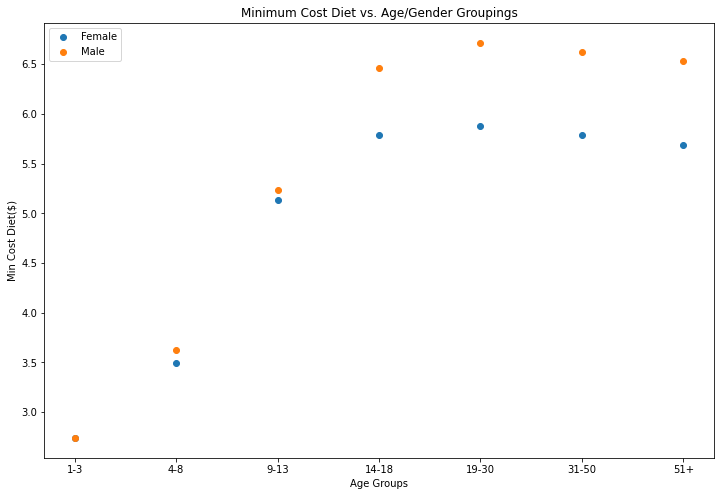

In [16]:
f_graph = []
f_columns = []
m_graph = []
m_columns = []
ingredients = []

import seaborn as sns
import matplotlib.pyplot as plt
for g in dietreq_meal.columns:
    result = solve_subsistence_problem2(price_nutrition.T,Prices,dietreq_meal[str(g)])
    if 'F' in g or 'C' in g:
        f_graph.append(result.fun);
        
    if 'M' in g or 'C' in g:
        m_graph.append(result.fun);

ingredients.append(result.diet)
plt.figure(figsize=(12,8 ))
plt.title('Minimum Cost Diet vs. Age/Gender Groupings')
plt.scatter(x=just_ages,y=f_graph)
plt.scatter(x=just_ages,y=m_graph)
plt.xlabel('Age Groups')
plt.ylabel('Min Cost Diet($)')
plt.legend(['Female','Male'],loc='upper left')
plt.show()

#### How does the minimum cost diet change with different levels of activity?

/tmp/ipykernel_24/57864428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_req.loc[0,group]= pop_req.iloc[0,1:3] + activity


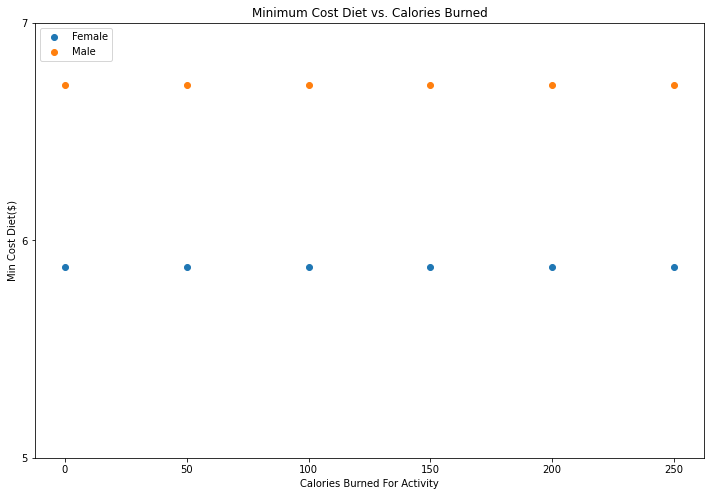

In [17]:
#Deliverable A: Visualizing how different demographic changes effect cost
f_graph = []
f_columns = []
m_graph = []
m_columns = []
ingredients = []
activity= np.arange(0,300,50)

for i in activity:
    pop = create_pop(['F 19-30','M 19-30'],i)
    f_graph.append(solve_subsistence_problem2(price_nutrition.T,Prices,pop['F 19-30']).fun)
    m_graph.append(solve_subsistence_problem2(price_nutrition.T,Prices,pop['M 19-30']).fun)

ingredients.append(result.diet)
plt.figure(figsize=(12,8 ))
plt.title('Minimum Cost Diet vs. Calories Burned')
plt.scatter(x=activity,y=f_graph)
plt.scatter(x=activity,y=m_graph)
plt.xlabel('Calories Burned For Activity')
plt.ylabel('Min Cost Diet($)')
plt.legend(['Female','Male'],loc='upper left')
plt.yticks(np.arange(5,8))
plt.show()

<b> [B] What is the total cost for the population of interest? </b>

Our total population is the total population of undergraduate students at UC Berkeley. According to US News, UC Berkeley has about a total undergraduate population of 31,814 students and 13,243 graduate students. The male:female ratio for both types of students 17,226:14,321 and 6,321:6,762 respectively. Most of the students in both degrees are between the ages of 19-30, which all fall into the age range bucket of 19-30 in our data set. 

Source: https://opa.berkeley.edu/campus-data/uc-berkeley-quick-facts

In [18]:
total_cost_ug = (result_M.fun * 14321) + (result_F.fun * 17226)
print('Total cost for Berkeley Undergrad is' + ' '+ str(total_cost_ug))

Total cost for Berkeley Undergrad is 197411.93095970195


In [19]:
total_cost_grad = (result_M.fun * 6762) + (result_F.fun *6312 )
print('Total cost for Berkeley Grad is' + ' ' + str(total_cost_grad))

Total cost for Berkeley Grad is 82508.10459562989


These are the total projected costs in order to feed the entire student population at Berkeley one meal. While this may seem exorbitantly high, this is because we are not able to account for a lot of discounts in pricing, including but not limited to general sales, university partnerships,and buying in massive bulk.